In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load the Excel file
df = pd.read_excel("PowerBI_Cleaned_EV_Data.xlsx")

# Show the top 5 rows
df.head()


,Unnamed: 0,VIN_110,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Electric_Utility,2020_Census_Tract,Latitude,Longitude
0,0,5YJ3E1EB6K,KING,SEATTLE,WA,98178,2019,TESLA,MODEL 3,BATTERY ELECTRIC VEHICLE (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,37,101250425,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011902,47.49461,-122.23825
1,1,5YJYGAEE5M,YAKIMA,SELAH,WA,98942,2021,TESLA,MODEL Y,BATTERY ELECTRIC VEHICLE (BEV),Eligibility unknown as battery range has not b...,0,0,15,224162858,PACIFICORP,53077003100,46.65405,-120.53145
2,2,5YJSA1E65N,YAKIMA,GRANGER,WA,98932,2022,TESLA,MODEL S,BATTERY ELECTRIC VEHICLE (BEV),Eligibility unknown as battery range has not b...,0,0,15,187279214,PACIFICORP,53077002104,46.33949,-120.18710
3,3,5YJ3E1EBXN,KING,BELLEVUE,WA,98004,2022,TESLA,MODEL 3,BATTERY ELECTRIC VEHICLE (BEV),Eligibility unknown as battery range has not b...,0,0,41,219428079,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023902,47.61001,-122.18720
4,4,JM3KKEHA8S,THURSTON,YELM,WA,98597,2025,MAZDA,CX-90,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),Not eligible due to low battery range,26,0,2,277791643,PUGET SOUND ENERGY INC,53067012412,46.94239,-122.60735


## Preprocess the Data

In [5]:
# Select useful columns
df = df[['Model_Year', 'Make', 'Electric_Range', 'Base_MSRP', 'Electric_Vehicle_Type']]

# Drop any missing values
df = df.dropna()

# Convert 'Make' to numeric codes
df['Make'] = df['Make'].astype('category').cat.codes

# Convert target variable to 0 (PHEV) and 1 (BEV)
df['Electric_Vehicle_Type'] = df['Electric_Vehicle_Type'].apply(
    lambda x: 1 if x == "BATTERY ELECTRIC VEHICLE (BEV)" else 0
)

df.head()


,Model_Year,Make,Electric_Range,Base_MSRP,Electric_Vehicle_Type
0,2019,39,220,0,1
1,2021,39,0,0,1
2,2022,39,0,0,1
3,2022,39,0,0,1
4,2025,26,26,0,0


## Split into Train/Test Sets

In [6]:
# Features (X) and Target (y)
X = df.drop('Electric_Vehicle_Type', axis=1)
y = df['Electric_Vehicle_Type']

# Split the dataset: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Train Two Models

Logistic Regression:

In [7]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

Decision Tree:

In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

## Evaluate the Models

In [9]:
# Logistic Regression
log_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

# Decision Tree
tree_pred = tree_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))


Logistic Regression Accuracy: 0.7085727418984141
[[ 543 1132]
 [ 136 2540]]
              precision    recall  f1-score   support

           0       0.80      0.32      0.46      1675
           1       0.69      0.95      0.80      2676

    accuracy                           0.71      4351
   macro avg       0.75      0.64      0.63      4351
weighted avg       0.73      0.71      0.67      4351


Decision Tree Accuracy: 0.9993105033325672
[[1674    1]
 [   2 2674]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1675
           1       1.00      1.00      1.00      2676

    accuracy                           1.00      4351
   macro avg       1.00      1.00      1.00      4351
weighted avg       1.00      1.00      1.00      4351



## Visualize Confusion Matrix

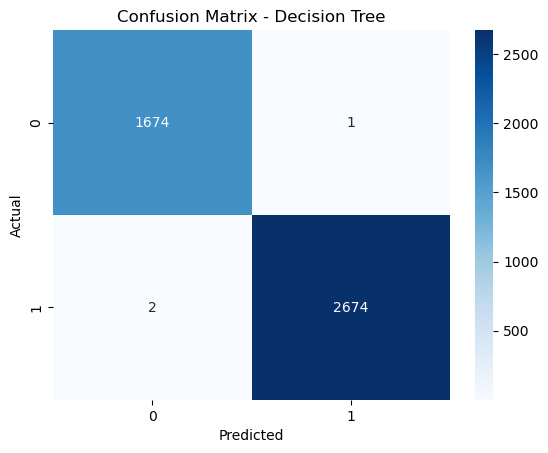

In [10]:
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Distribution of Electric Range

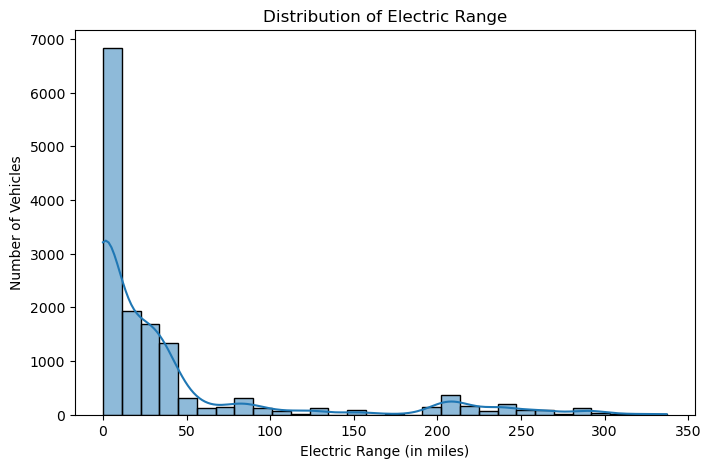

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Electric_Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (in miles)')
plt.ylabel('Number of Vehicles')
plt.show()


## BEV vs PHEV Count

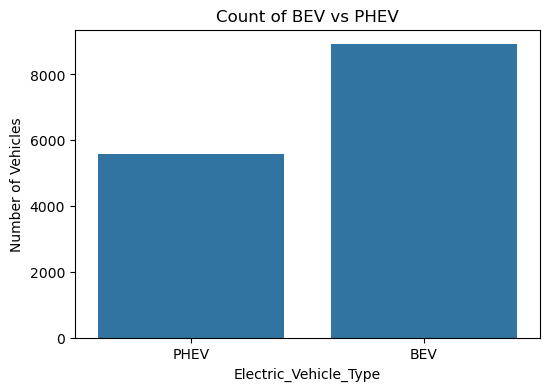

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Electric_Vehicle_Type', data=df)
plt.title('Count of BEV vs PHEV')
plt.xticks([0, 1], ['PHEV', 'BEV'])  # since we converted BEV=1, PHEV=0
plt.ylabel('Number of Vehicles')
plt.show()


## Average Electric Range by Make

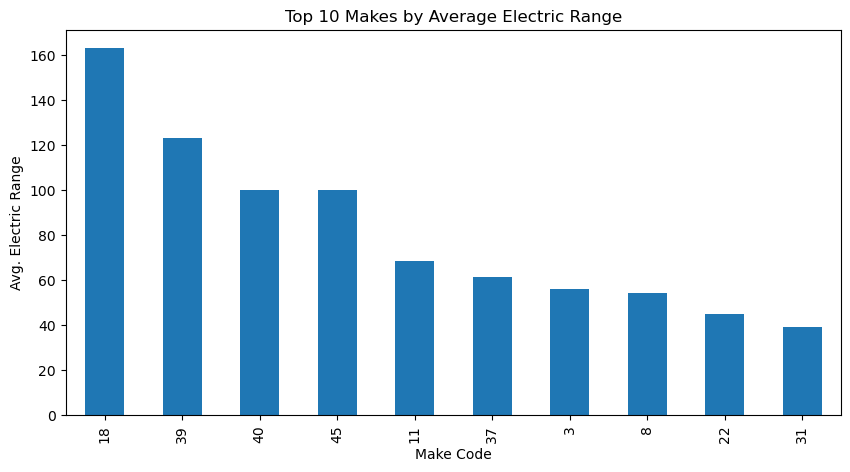

In [13]:
plt.figure(figsize=(10, 5))
avg_range_by_make = df.groupby('Make')['Electric_Range'].mean().sort_values(ascending=False).head(10)
avg_range_by_make.plot(kind='bar')
plt.title('Top 10 Makes by Average Electric Range')
plt.ylabel('Avg. Electric Range')
plt.xlabel('Make Code')
plt.show()


## Correlation Heatmap

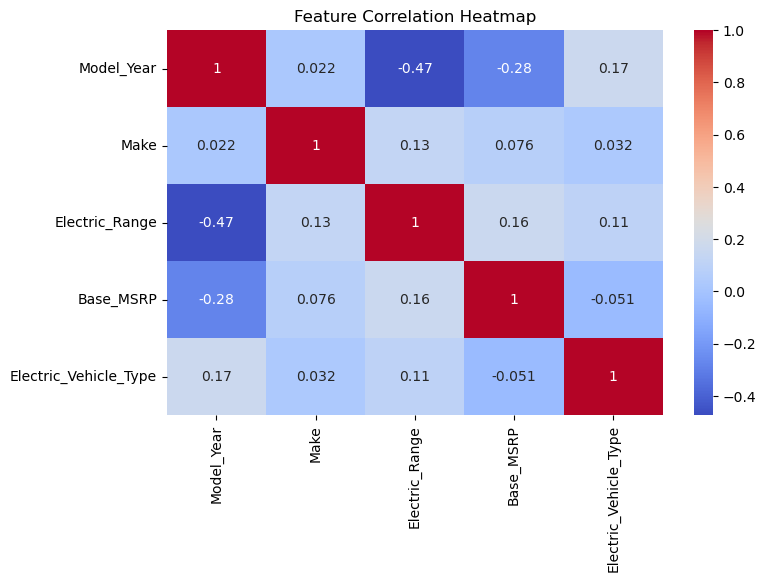

In [14]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## Model Accuracy Comparison (Bar Plot)

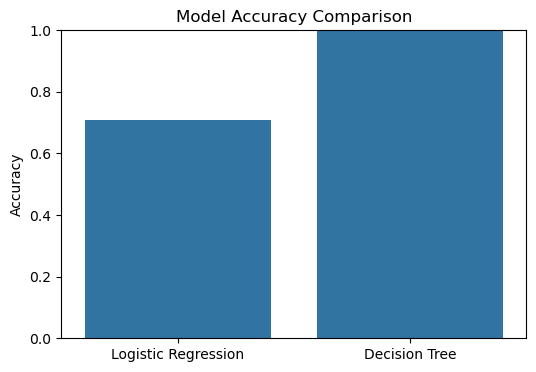

In [15]:
accuracies = {
    'Logistic Regression': accuracy_score(y_test, log_pred),
    'Decision Tree': accuracy_score(y_test, tree_pred),
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
